In [311]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [312]:
df=pd.read_csv("bollywood.csv")
df.head(10)

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224
5,6,30-May-14,Citylights,HS,Drama,7,35.00,1076591,1806,84
6,7,19-Sep-14,Daawat-E-Ishq,N,Comedy,30,24.60,3905050,8315,1373
7,8,11-Jan-13,Matru Ki Bijlee Ka Mandola,N,Comedy,33,40.00,2435283,4326,647
8,9,10-Jan-14,Dedh Ishqiya,LW,Comedy,31,27.00,2333067,2436,591
9,10,11-Jan-13,Gangoobai,N,Drama,2,0.01,4354,1,1


In [313]:
#How many records are present in dataset
index=df.index
Number_of_records=len(index)
print(Number_of_records)

149


In [314]:
#*Number of genre in dataset
df['Genre']=df.Genre.str.strip()
df['Genre'].nunique()


5

In [315]:
#*Movie having highest number of youtube views
max_views=df['YoutubeViews'].max()
movie_name=df[df['YoutubeViews']==max_views].MovieName
print(movie_name)

119    Krrish 3
Name: MovieName, dtype: object


In [316]:
#How many movies got released in each Release Time?Sort number of releases in each Release Time in descending order.
print(df['ReleaseTime'].value_counts().sort_values(ascending=False))



N     99
HS    18
FS    17
LW    15
Name: ReleaseTime, dtype: int64


In [317]:
#Which genre had highest number of releases
print(df['ReleaseTime'].value_counts().idxmax())

N


In [318]:
#How many movies in each genre got released in different release times like weekend,festive season,etc.
pd.crosstab(df.Genre,df.ReleaseTime)

ReleaseTime,FS,HS,LW,N
Genre,,,,
Action,3,3,3,15
Comedy,3,5,5,23
Drama,4,6,1,24
Romance,3,3,4,15
Thriller,4,1,2,22


In [319]:
#Which month of the year were leastnumber movie releases are seen? (Note: Extract a new column called month fromReleaseDatecolumn.)
df["month"]=pd.to_datetime(df['Release Date']).dt.month
df.head()
min_val=df["month"].value_counts().idxmin()
print(min_val)

12


In [320]:
#Which month of the year typically seesmost releases of lowbudgeted movies, that is, movies with budget less than 25 crore ?
print(df[df["Budget"]<25].month.value_counts().idxmax())

5


In [321]:
#Which are the top 10 movies with maximum return on investment (ROI)? Calculate return on investment (ROI) as (BoxOfficeCollection–Budget) / Budget.
df["ROI"]=df.apply(lambda x:(x.BoxOfficeCollection-x.Budget)/(x.Budget),axis=1)
df.head(10)
print(df[df["ROI"]==df["ROI"].max()].MovieName)


64    Aashiqui 2
Name: MovieName, dtype: object


In [322]:
#Do the movies have higher ROI if they get released on festive seasons or holiday season? Calculate the average ROI for different release times.
Roi={}
for i in df.ReleaseTime.unique():
    Roi[i]=df[df['ReleaseTime']==i].ROI.mean()
print(Roi)
print("Here we can see that movies with release on Holiday or festive season have greater return than normal days but their return is less than long weeekend releases")
df.groupby(['ReleaseTime']).ROI.mean()

{'LW': 1.1272053098737973, 'N': 0.6577216305350877, 'HS': 0.8508667840873724, 'FS': 0.9738532013595953}
Here we can see that movies with release on Holiday or festive season have greater return than normal days but their return is less than long weeekend releases


ReleaseTime
FS    0.973853
HS    0.850867
LW    1.127205
N     0.657722
Name: ROI, dtype: float64

In [323]:
#Is there a correlation between box office collection and YouTube Likes? Is the correlation positive or negative?
column_1=df["BoxOfficeCollection"]
column_2=df["YoutubeLikes"]
correlation=column_1.corr(column_2)
print(correlation)

0.6825165877731297


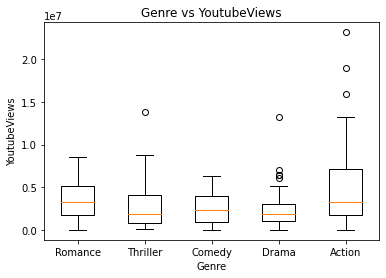

In [324]:
#Which genre of movies typically sees more YouTube views? Draw boxplots for each genre of movies to compare.
genre_views={}
for i in df["Genre"].unique():
    genre_views[i]=df[df["Genre"]==i].YoutubeViews
plt.boxplot([x for x in genre_views.values()],labels=[x for x in genre_views.keys()])
plt.xlabel('Genre')
plt.ylabel('YoutubeViews')
plt.title('Genre vs YoutubeViews')

plt.show()

<AxesSubplot:title={'center':'YoutubeViews'}, xlabel='Genre'>

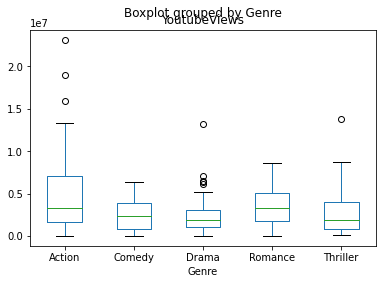

In [325]:
df.boxplot(by ='Genre', column =['YoutubeViews'], grid = False)

In [326]:
#Which of the variables among Budget,BoxOfficeCollection,YoutubeView,YoutubeLikes,YoutubeDislikes are highly correlated? Note: Draw pair plot orheatmap.
cols=['Budget','BoxOfficeCollection','YoutubeViews','YoutubeLikes','YoutubeDislikes']
df_1=df[cols]
corr=df_1.corr()

print(corr)


                       Budget  BoxOfficeCollection  YoutubeViews  \
Budget               1.000000             0.650401      0.589038   
BoxOfficeCollection  0.650401             1.000000      0.588632   
YoutubeViews         0.589038             0.588632      1.000000   
YoutubeLikes         0.608916             0.682517      0.884055   
YoutubeDislikes      0.665343             0.623941      0.846739   

                     YoutubeLikes  YoutubeDislikes  
Budget                   0.608916         0.665343  
BoxOfficeCollection      0.682517         0.623941  
YoutubeViews             0.884055         0.846739  
YoutubeLikes             1.000000         0.859730  
YoutubeDislikes          0.859730         1.000000  


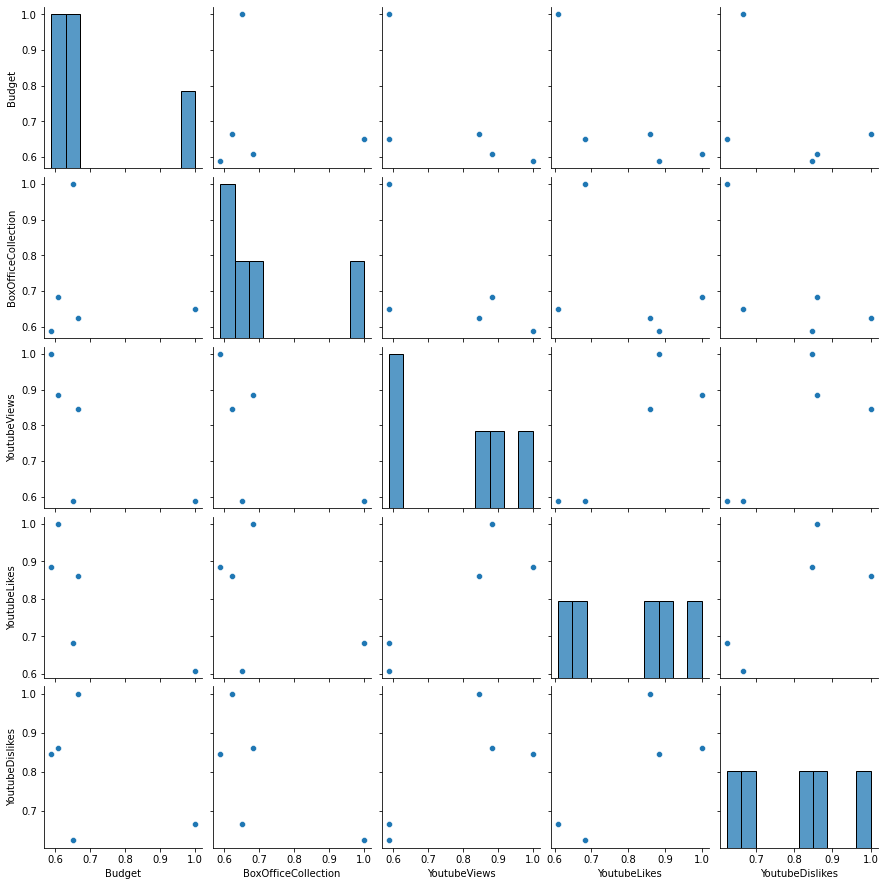

In [327]:
sns.pairplot(corr, diag_kws={'bins': 10})
plt.show()

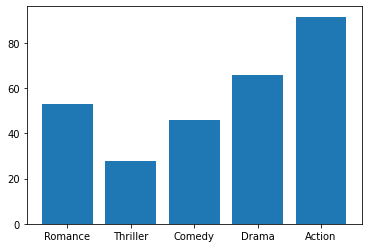

{'Romance': 52.84120000000001, 'Thriller': 27.936206896551727, 'Comedy': 46.115, 'Drama': 65.79314285714287, 'Action': 91.68083333333334}


In [328]:
#During 2013−2015 period,highlight the genre of movies and their box office collection? Visualize with best fit graph.
df["year"]=pd.to_datetime(df['Release Date']).dt.year
year={}
df.head()
for i in df["Genre"].unique():
    year[i]=df[df["Genre"]==i].BoxOfficeCollection.mean()
plt.bar(year.keys(),year.values())
plt.show()

print(year)

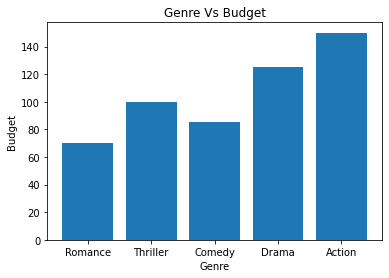

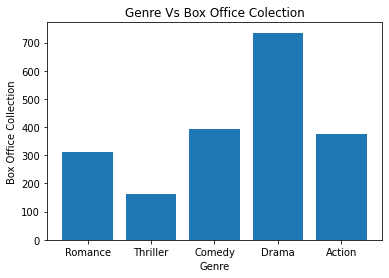

In [329]:
#Visualize the Budget and Box office collection based on Genre
plt.bar(df.Genre,df.Budget)
plt.xlabel('Genre')
plt.ylabel('Budget')
plt.title('Genre Vs Budget')
plt.show()
plt.bar(df.Genre,df.BoxOfficeCollection)
plt.xlabel('Genre')
plt.ylabel('Box Office Collection')
plt.title('Genre Vs Box Office Colection')
plt.show()





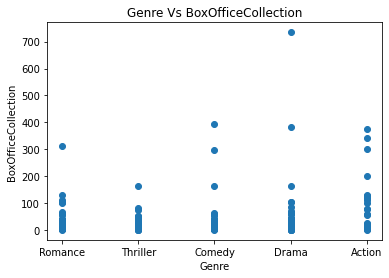

In [330]:
#Find the distribution of movie budget for every Genre.
plt.scatter(df.Genre,df.BoxOfficeCollection)
plt.xlabel('Genre')
plt.ylabel('BoxOfficeCollection')
plt.title('Genre Vs BoxOfficeCollection')
plt.show()

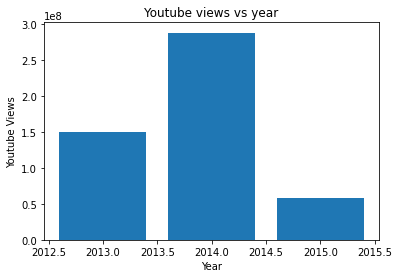

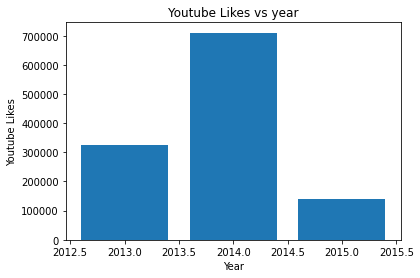

In [331]:
#During 2013−2015, Visualize the number of Youtube views, Youtube likes released in every year. Also, visualize with best fit graph.
movies_year={}
for i in df["year"].unique():
    movies_year[i]=df[df["year"]==i].YoutubeViews.sum()
plt.bar([x for x in movies_year.keys()],[x for x in movies_year.values()])
plt.xlabel('Year')
plt.ylabel('Youtube Views')
plt.title('Youtube views vs year')
plt.show()
movies_year_2={}
for i in df["year"].unique():
    movies_year_2[i]=df[df["year"]==i].YoutubeLikes.sum()
plt.bar([x for x in movies_year_2.keys()],[x for x in movies_year_2.values()])
plt.xlabel('Year')
plt.ylabel('Youtube Likes')
plt.title('Youtube Likes vs year')
plt.show()

    